In [483]:
# Load packages
import os
import csv
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress


In [484]:
# load csv data for state population
state_pop = Path("../Data/State_Population.csv")
state_pop = pd.read_csv(state_pop)
state_pop

,Date,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,2004-01-01,112468.897763,187235.313336,166981.743111,101330.145359,320965.660495,222891.848203,240366.466568,197922.447840,267170.444443,...,120966.245893,122685.992092,120843.533394,180548.766033,159287.338362,177558.177299,212860.778161,86900.603167,150926.440573,154013.426255
1,2004-02-01,112725.088423,187841.549097,167847.418906,101783.232071,325732.847350,223182.101684,242095.673819,199353.176577,270092.529977,...,121415.468933,123007.298345,121661.051633,180839.208311,160645.635537,179308.464022,214128.636011,87419.094513,151705.824485,154493.152088
2,2004-03-01,113012.039266,188271.790840,168900.513316,102304.179582,331170.356031,223520.345262,243749.324603,200834.169881,273584.934185,...,122002.587018,123363.249017,122955.182386,181171.778189,162105.970945,181345.555866,215461.768858,88034.036663,152507.819145,155126.857142
3,2004-04-01,113305.182222,189382.536002,170180.251404,102880.788798,337412.489527,224019.582683,245757.604398,202654.263263,277048.370050,...,122502.409568,123763.276144,124239.434257,181569.731315,163691.500174,183784.251765,217005.863589,88581.017025,153457.607735,155979.327633
4,2004-05-01,113666.681304,190588.147633,171738.808920,103421.568193,344599.782061,224670.441514,248250.261007,204843.252789,281171.423631,...,123091.200481,124167.724328,125300.686962,181787.254249,165682.582390,186704.735618,218988.123794,89089.913281,154662.247862,157153.052502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2024-05-01,227524.247038,363290.965144,432274.680739,205896.930970,764707.162319,542918.099073,401491.607133,386560.209990,610515.235862,...,306531.025094,319367.918462,302475.250490,518697.334077,395677.003125,387947.017497,587071.326297,164601.308284,302491.010264,348244.039504
245,2024-06-01,228061.268922,363854.251343,432533.104343,206730.235098,767178.618740,542727.516817,403398.170324,386830.584595,607440.550149,...,306824.690717,320352.089485,302243.927123,518355.289407,397105.533635,389466.481347,588415.061874,165730.883276,304060.266106,349001.632364
246,2024-07-01,228135.820387,364036.253448,432162.979260,207159.230291,769174.440854,542427.979618,404912.797158,386417.123902,604398.509443,...,306768.273498,320732.719405,301684.071632,517456.432249,396759.976718,390381.307395,588964.665940,166679.375349,304939.825318,349521.144205
247,2024-08-01,227995.823618,364120.059471,431359.869290,207546.207005,770943.060728,542574.854415,406441.864296,386519.200325,601682.706988,...,307010.535770,320507.222400,301269.529498,516881.755176,396336.393013,391307.648836,589475.534421,167259.074236,305877.340380,350933.427970


In [485]:
# Formatted 'Date' column to datetime
state_pop['Date'] = pd.to_datetime(state_pop['Date'])

# Extract the year from the 'Date' column
state_pop['Year'] = state_pop['Date'].dt.year

# Filter data from 2004 to current
state_pop_filtered = state_pop[state_pop['Year'] >= 2004]

# Grouped data by 'Year' and calculate the state average for each year
state_pop_avg = state_pop_filtered.drop(columns=['Date', 'Year']).mean(axis=1).groupby(state_pop_filtered['Year']).mean()

# Formatted the results to 2 decimal places
state_pop_avg = state_pop_avg.round(2)

# Converted the result into a DataFrame and add the column name 'U.S. Average'
state_pop_avg_df = pd.DataFrame(state_pop_avg)
state_pop_avg_df.columns = ['U.S. Pop Avg.']

# Displayed results
state_pop_avg_df

,U.S. Pop Avg.
Year,
2004,175862.63
2005,196628.16
2006,214210.08
2007,217579.23
2008,208241.76
2009,191415.51
2010,185657.04
2011,177631.77
2012,176440.37


In [486]:
# Calculated the YoY percentage change
state_pop_avg_df['YoY Population Change (%)'] = state_pop_avg_df['U.S. Pop Avg.'].pct_change() * 100

# Formatted the results to 2 decimal places
state_pop_avg_df['YoY Population Change (%)'] = state_pop_avg_df['YoY Population Change (%)'].round(2)

# dropped null values
state_pop_avg_df = state_pop_avg_df.dropna(subset=['YoY Population Change (%)'])

# Displayed result
state_pop_avg_df

,U.S. Pop Avg.,YoY Population Change (%)
Year,,
2005,196628.16,11.81
2006,214210.08,8.94
2007,217579.23,1.57
2008,208241.76,-4.29
2009,191415.51,-8.08
2010,185657.04,-3.01
2011,177631.77,-4.32
2012,176440.37,-0.67
2013,186568.09,5.74


In [487]:
# loaded csv housing inventory US data
housing_inventory = Path("../Data/Housing_Inventory_US.csv")
home_inventory = pd.read_csv(housing_inventory)

# Converted to dataframe 
home_inventory_df = pd.DataFrame(home_inventory)

# Displayed results
home_inventory_df

,DATE,Housing Inventory (US)
0,2004-01-01,122632.0
1,2004-04-01,123099.0
2,2004-07-01,123587.0
3,2004-10-01,124096.0
4,2005-01-01,124611.0
...,...,...
78,2023-07-01,145474.0
79,2023-10-01,145863.0
80,2024-01-01,146252.0
81,2024-04-01,146640.0


In [488]:
# Formatted 'Date' column to datetime
home_inventory_df['DATE'] = pd.to_datetime(home_inventory_df['DATE'])

# Extract the year from the 'Date' column
home_inventory_df['Year'] = home_inventory_df['DATE'].dt.year

# Grouped data by 'Year' and aggregated the Housing Inventory US totals for that year 
us_home_inv_df = home_inventory_df.groupby('Year')['Housing Inventory (US)'].sum().reset_index()

# Drop 2016 due to incomplete data set for that year
us_home_inv_df = us_home_inv_df[us_home_inv_df['Year'] != 2016]

# Displayed results
us_home_inv_df

,Year,Housing Inventory (US)
0,2004,493414.0
1,2005,501452.0
2,2006,509195.0
3,2007,516261.0
4,2008,521658.0
5,2009,525073.0
6,2010,527244.0
7,2011,529209.0
8,2012,531319.0
9,2013,534034.0


In [489]:
# Calculate the YoY percentage change
us_home_inv_df['YoY Inventory Change (%)'] = us_home_inv_df['Housing Inventory (US)'].pct_change() * 100

# Formatted the results to 2 decimal places
us_home_inv_df['YoY Inventory Change (%)'] = us_home_inv_df['YoY Inventory Change (%)'].round(2)

us_home_inv_df = us_home_inv_df.dropna(subset=['YoY Inventory Change (%)'])
# Displayed results
print(us_home_inv_df)

    Year  Housing Inventory (US)  YoY Inventory Change (%)
1   2005                501452.0                      1.63
2   2006                509195.0                      1.54
3   2007                516261.0                      1.39
4   2008                521658.0                      1.05
5   2009                525073.0                      0.65
6   2010                527244.0                      0.41
7   2011                529209.0                      0.37
8   2012                531319.0                      0.40
9   2013                534034.0                      0.51
10  2014                537282.0                      0.61
11  2015                540804.0                      0.66
13  2017                548892.0                      1.50
14  2018                553389.0                      0.82
15  2019                558045.0                      0.84
16  2020                563049.0                      0.90
17  2021                568542.0                      0.

In [490]:
# merged us_home_inv_df and state_pop_avg_df
home_inv_vs_pop_df = pd.merge(us_home_inv_df,state_pop_avg_df, how="outer", on="Year")

# Dropped null values
home_inv_vs_pop_df = home_inv_vs_pop_df.dropna()

# Exclude 2024. Incomplete data for 2024 as the year is not over yet. 
home_inv_vs_pop_df = home_inv_vs_pop_df[home_inv_vs_pop_df['Year'] != 2024]

# filtered data between 2017 and 2023
home_inv_vs_pop_df = home_inv_vs_pop_df[home_inv_vs_pop_df['Year'] >= 2017]

# displayed results
home_inv_vs_pop_df 

,Year,Housing Inventory (US),YoY Inventory Change (%),U.S. Pop Avg.,YoY Population Change (%)
12,2017,548892.0,1.50,230605.54,5.34
13,2018,553389.0,0.82,244094.82,5.85
14,2019,558045.0,0.84,255115.32,4.51
15,2020,563049.0,0.90,270742.71,6.13
16,2021,568542.0,0.98,310481.66,14.68
17,2022,574858.0,1.11,350907.08,13.02
18,2023,581119.0,1.09,356610.26,1.63


In [491]:
# Calculated the compounded annual growth rate of new home listings between 2017 and 2023
housing_inv_2017 = home_inv_vs_pop_df.loc[home_inv_vs_pop_df['Year'] == 2017, 'Housing Inventory (US)'].values[0]
housing_inv_2023 = home_inv_vs_pop_df.loc[home_inv_vs_pop_df['Year'] == 2023, 'Housing Inventory (US)'].values[0]
CAGR_inv = (housing_inv_2023/housing_inv_2017)**(1/6)
CAGR_inv = (CAGR_inv-1)*100
CAGR_inv

0.955432967058556

In [492]:
# Calculated the compounded annual growth rate of U.S. Population between 2017 and 2023
pop_2017 = home_inv_vs_pop_df.loc[home_inv_vs_pop_df['Year'] == 2017, 'U.S. Pop Avg.'].values[0]
pop_2023 = home_inv_vs_pop_df.loc[home_inv_vs_pop_df['Year'] == 2023, 'U.S. Pop Avg.'].values[0]
CAGR_pop = (pop_2023/pop_2017)**(1/6)
CAGR_pop = (CAGR_pop-1)*100
CAGR_pop

7.536034222982724

In [493]:
# Defined the x axis
x_axis = home_inv_vs_pop_df['Year'].astype(int)

# reset index
y_axis_inv = home_inv_vs_pop_df.reset_index(drop=True)

# Defined the y axis for housing inventory
y_axis_inv = (y_axis_inv['YoY Inventory Change (%)'])


In [494]:
# reset index
y_axis_pop = home_inv_vs_pop_df.reset_index(drop=True)

# Defined y axis for U.S. Population
y_axis_pop = (y_axis_pop['YoY Population Change (%)'])

Text(0.5, 1.0, 'Population Change Vs. New Home Listings 2017-2023')

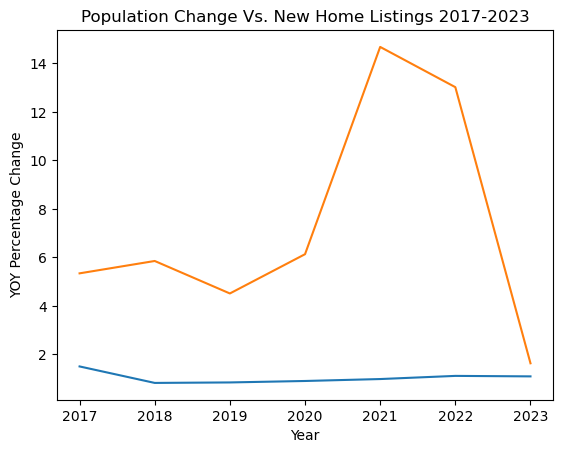

In [495]:
# Ensuring that the data type is an integer
x_axis = home_inv_vs_pop_df['Year'].astype(int)

# Plot the data
plt.plot(x_axis, y_axis_inv, label="YoY Inventory Change (%)")
plt.plot(x_axis, y_axis_pop, label="YoY Population Change (%)")

# Add labels, title, and legend
plt.xlabel("Year")
plt.ylabel("YOY Percentage Change")
plt.title("Population Change Vs. New Home Listings 2017-2023")



In [496]:
# load csv data for WSJ Prime Rate
prime = Path("../Data/WSJ_Prime_Rate.csv")
prime = pd.read_csv(prime)

# Converted to dataframe 
prime_df = pd.DataFrame(prime)

In [497]:
# Formatted 'Date of Rate Change' column to datetime 
prime_df['Date of Rate Change'] = pd.to_datetime(prime_df['Date of Rate Change'], format='%A, %B %d, %Y')

# Extract the year
prime_df['Year'] = prime_df['Date of Rate Change'].dt.year

# Select columns 'Year' and 'Rate (%)'
prime_df = prime_df[['Year', 'Rate (%)']]

# Group data by 'Year' and calculate the mean of 'Rate (%)'
prime_df = prime_df.groupby('Year')['Rate (%)'].mean().reset_index()

# Filtered data from 2004 to current
prime_df = prime_df[prime_df['Year'] >= 2004]

# Reset index
prime_df = prime_df.reset_index(drop=True)

# Create new data for 2009-2014 and 2021. No rate changes occurred in these years.
new_df = pd.DataFrame({'Year': [2009, 2010, 2011, 2012, 2013, 2014, 2021], 
                       'Rate (%)': [4.928571, 4.928571, 4.928571, 4.928571, 4.928571, 4.928571, 3.75]})

# Concatenated the new data to the existing DataFrame
prime_df = pd.concat([prime_df, new_df], ignore_index=True)

# Sorted data by year in ascending order
prime_df = prime_df.sort_values(by='Year', ascending=True).reset_index(drop=True)

# Display the updated DataFrame
prime_df

,Year,Rate (%)
0,2004,4.750000
1,2005,6.375000
2,2006,7.875000
3,2007,7.500000
4,2008,4.928571
5,2009,4.928571
6,2010,4.928571
7,2011,4.928571
8,2012,4.928571
9,2013,4.928571


In [498]:
# Reset index
us_home_inv_df = home_inventory_df.reset_index()[["DATE", "Housing Inventory (US)"]]

# Converted 'Date' column to datetime
us_home_inv_df['DATE'] = pd.to_datetime(us_home_inv_df['DATE'])

# Extract the year from the 'Date' column
us_home_inv_df['Year'] = us_home_inv_df['DATE'].dt.year

# Group by 'Year' and caculated the mean value for Housing Inventory
us_home_inv_df = us_home_inv_df.groupby('Year')['Housing Inventory (US)'].mean().reset_index()

# Displayed results
us_home_inv_df

,Year,Housing Inventory (US)
0,2004,123353.500000
1,2005,125363.000000
2,2006,127298.750000
3,2007,129065.250000
4,2008,130414.500000
5,2009,131268.250000
6,2010,131811.000000
7,2011,132302.250000
8,2012,132829.750000
9,2013,133508.500000


In [499]:
# Merged us_home_inv_df and prime_df
rate_vs_avail_df = pd.merge(us_home_inv_df,prime_df, how="outer", on="Year")

# Displayed results
rate_vs_avail_df

,Year,Housing Inventory (US),Rate (%)
0,2004,123353.500000,4.750000
1,2005,125363.000000,6.375000
2,2006,127298.750000,7.875000
3,2007,129065.250000,7.500000
4,2008,130414.500000,4.928571
5,2009,131268.250000,4.928571
6,2010,131811.000000,4.928571
7,2011,132302.250000,4.928571
8,2012,132829.750000,4.928571
9,2013,133508.500000,4.928571


The r-squared is: 0.0005703265458220814


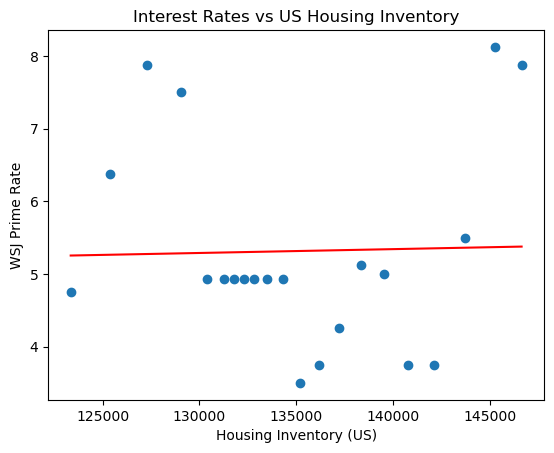

In [500]:
# Defined x and y value
x_values = rate_vs_avail_df['Housing Inventory (US)']
y_values = rate_vs_avail_df['Rate (%)']

# Created the linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")

# Created the scatter plot 
plt.scatter(x_values,y_values)

# Formatted the scatter plot and added labels
plt.annotate(line_eq,(125000, 3.25),fontsize=15,color="red")
plt.title('Interest Rates vs US Housing Inventory')
plt.xlabel('Housing Inventory (US)')
plt.ylabel('WSJ Prime Rate')

# Displayed the r-value
print(f"The r-squared is: {rvalue**2}")

In [501]:
# loaded csv data for building permits 
build_permit = Path("../Data/Build_Permit.csv")
build_permit = pd.read_csv(build_permit)

# Converted data to dataframe
build_permit_df = pd.DataFrame(build_permit)

In [502]:
build_permit_df

,Date,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,2004-01-01,2362.659688,228.375488,6125.353891,1292.034177,16135.819376,3688.262428,956.699800,660.943737,10.0,...,573.572977,3237.149612,14011.779391,1779.775705,313.948367,4957.607863,3449.685776,401.012169,3223.911694,273.210497
1,2004-02-01,2295.240670,190.714917,6048.844553,1052.341451,16223.077407,3365.395504,867.594829,739.359216,105.0,...,435.726383,3588.560738,14089.163796,1661.860011,194.084734,4893.406704,3205.731578,451.318249,3290.050681,210.088604
2,2004-03-01,3019.797614,248.156023,7132.259490,1097.886143,17173.783094,4012.430210,994.390833,783.786522,38.0,...,572.075383,4733.472770,15180.040091,1990.707014,340.610045,5156.859073,3983.673366,495.385023,3213.997928,247.925462
3,2004-04-01,2425.664445,282.369728,7405.707855,1633.830391,16985.603333,3927.088989,944.699453,532.186749,727.0,...,480.988435,3553.838905,15296.327936,2058.375536,354.831705,5571.010519,3815.362772,465.042114,3388.201748,226.662655
4,2004-05-01,2386.274858,329.782850,6719.256073,1553.764383,16074.646047,3875.006716,798.956106,677.534504,19.0,...,455.595292,3457.318033,15798.133029,1892.606713,316.215130,4887.010131,3747.312217,390.333664,2686.990125,226.767621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2024-05-01,2130.778251,187.099856,4712.299950,993.476026,9309.683175,2729.362146,390.703736,500.452844,40.0,...,405.835320,4588.909623,17994.787753,1992.807008,236.080019,3020.521134,3021.203136,326.455239,1824.845398,178.905168
245,2024-06-01,1425.227511,54.436120,5002.911556,1039.854609,7439.517109,2365.510555,342.230598,531.342151,88.0,...,428.686491,3090.488006,16576.701925,1816.611354,153.914889,2498.320334,2504.619788,284.460764,1686.740849,111.642479
246,2024-07-01,1441.794418,51.278264,4726.195003,999.990223,8980.732760,2610.768314,490.878662,479.514924,149.0,...,459.410735,3494.679562,18744.671898,1777.664000,271.421887,3050.467570,3086.468122,345.226664,1960.288991,161.285931
247,2024-08-01,1642.490426,52.890347,5016.083789,1101.317104,7798.401522,2070.388259,427.327711,481.568485,54.0,...,807.910439,4073.951412,18363.133737,1770.653975,164.798177,3016.161790,2845.683878,342.031403,1598.073455,139.749790


In [503]:
# Converted 'Date' column to datetime
build_permit_df['Date'] = pd.to_datetime(build_permit_df['Date'])

# Extract the year from the 'Date' column
build_permit_df['Year'] = build_permit_df['Date'].dt.year

# Drop 'Date' Column
build_permit_df.drop(columns=["Date"], inplace=True)

# Group data by year
build_permit_df = build_permit_df.groupby('Year').sum()

# Calculated the mean for all states in each year
build_permit_df['Average Build Permits in US'] = build_permit_df.mean(axis=1)

# Calculated the sum for all states in each year
build_permit_df['Total Build Permits in US'] = build_permit_df.sum(axis=1)

# Formatted data to 2 decimal places
build_permit_df['Average Build Permits in US'] = build_permit_df['Average Build Permits in US'].round(2)
build_permit_df['Total Build Permits in US'] = build_permit_df['Total Build Permits in US'].map('{:09.2f}'.format)
build_permit_df = build_permit_df[['Average Build Permits in US', 'Total Build Permits in US']]

# Displayed data
build_permit_df

,Average Build Permits in US,Total Build Permits in US
Year,,
2004,39384.73,2048005.76
2005,41537.54,2159952.14
2006,35633.50,1852941.96
2007,26797.55,1393472.53
2008,17095.35,888958.30
2009,11095.38,576959.93
2010,11621.27,604306.28
2011,11925.96,620150.10
2012,15821.12,822698.19


In [504]:
# Merged us_home_inv_df and build_permit_df

build_vs_avail_df = pd.merge(us_home_inv_df,build_permit_df, how="outer", on="Year")
build_vs_avail_df

,Year,Housing Inventory (US),Average Build Permits in US,Total Build Permits in US
0,2004,123353.500000,39384.73,2048005.76
1,2005,125363.000000,41537.54,2159952.14
2,2006,127298.750000,35633.50,1852941.96
3,2007,129065.250000,26797.55,1393472.53
4,2008,130414.500000,17095.35,888958.30
5,2009,131268.250000,11095.38,576959.93
6,2010,131811.000000,11621.27,604306.28
7,2011,132302.250000,11925.96,620150.10
8,2012,132829.750000,15821.12,822698.19
9,2013,133508.500000,18943.24,985048.61


The r-squared is: 0.004945153088260975


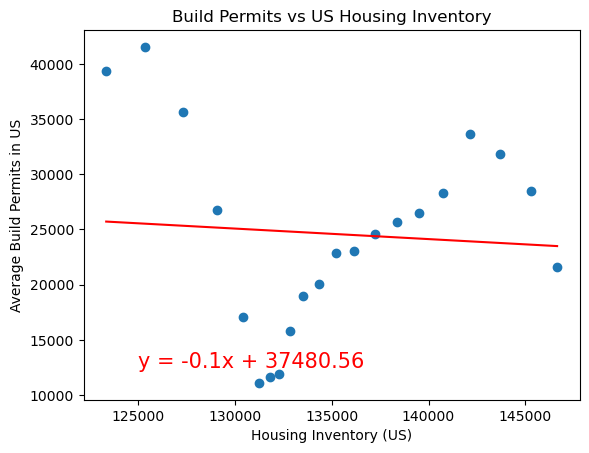

In [505]:
# Defined x and y value
x_values = build_vs_avail_df['Housing Inventory (US)']
y_values = build_vs_avail_df['Average Build Permits in US']

# Created the linear regression line

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")

# Created the scatter plot 
plt.scatter(x_values,y_values)

# Formatted the scatter plot and added labels
plt.annotate(line_eq,(125000, 12500),fontsize=15,color="red")
plt.title('Build Permits vs US Housing Inventory')
plt.xlabel('Housing Inventory (US)')
plt.ylabel('Average Build Permits in US')

# Displayed the r-value
print(f"The r-squared is: {rvalue**2}")

In [506]:
# load csv data for Housing Vacancies, Housing Vacancies for Sale, 
# and Housing Vacancies for Rent

rental_vacancy = Path("../Data/Vacant_Housing_Rent.csv")
rental_vacancy_df = pd.read_csv(rental_vacancy)

home_vacancy_sale = Path("../Data/Vacant_Housing_Sale.csv")
home_vacancy_sale_df = pd.read_csv(home_vacancy_sale)

us_home_vacancy = Path("../Data/Vacant_Housing_US.csv")
vacancy_df = pd.read_csv(us_home_vacancy)

In [507]:
# reset index
us_home_vacancy_df = vacancy_df.reset_index()[["DATE", "US Home Vacancy"]]

# Converted 'DATE' column to datetime
us_home_vacancy_df['DATE'] = pd.to_datetime(us_home_vacancy_df['DATE'])

# Extracted the year from the 'DATE' column
us_home_vacancy_df['Year'] = us_home_vacancy_df['DATE'].dt.year

# Group by 'Year' and calculated the mean
us_home_vacancy_df = us_home_vacancy_df.groupby('Year')['US Home Vacancy'].mean().reset_index()

# Displayed results
us_home_vacancy_df

,Year,US Home Vacancy
0,2004,15747.750000
1,2005,15878.750000
2,2006,16602.500000
3,2007,17807.500000
4,2008,18741.750000
5,2009,18972.750000
6,2010,18908.000000
7,2011,18758.250000
8,2012,18270.750000
9,2013,18222.000000


In [508]:
# reset index
home_vacancy_sale_df = home_vacancy_sale_df.reset_index()[["DATE", "Vacant Housing For Sale"]]

# Converted 'DATE' column to datetime
home_vacancy_sale_df['DATE'] = pd.to_datetime(home_vacancy_sale_df['DATE'])

# Extracted the year from the 'DATE' column
home_vacancy_sale_df['Year'] = home_vacancy_sale_df['DATE'].dt.year

# Group by 'Year' and calculated the mean value for Vacant Housing
home_vacancy_sale_df = home_vacancy_sale_df.groupby('Year')['Vacant Housing For Sale'].mean().reset_index()

# Displayed results
home_vacancy_sale_df

,Year,Vacant Housing For Sale
0,2004,1319.250000
1,2005,1467.500000
2,2006,1853.500000
3,2007,2135.000000
4,2008,2229.750000
5,2009,2036.000000
6,2010,2000.250000
7,2011,1902.250000
8,2012,1555.750000
9,2013,1538.250000


In [509]:
# reset index
rental_vacancy_df = rental_vacancy_df.reset_index()[["DATE", "Vacant Housing For Rent"]]

# Convert 'Date' to datetime and extract the year
rental_vacancy_df['DATE'] = pd.to_datetime(rental_vacancy_df['DATE'])

# Converted 'DATE' column to datetime
rental_vacancy_df['Year'] = rental_vacancy_df['DATE'].dt.year

# Group by 'Year' and calculated the mean for Vacant Housing for Rent
rental_vacancy_df = rental_vacancy_df.groupby('Year')['Vacant Housing For Rent'].mean().reset_index()

# Displayed results
rental_vacancy_df

,Year,Vacant Housing For Rent
0,2004,3838.500000
1,2005,3764.250000
2,2006,3772.250000
3,2007,3880.000000
4,2008,4063.750000
5,2009,4428.750000
6,2010,4322.750000
7,2011,4086.750000
8,2012,3825.250000
9,2013,3694.500000


In [510]:
# Created new dataframe by merging rental_vacancy_df with home_vacancy_sale_df
housing_availability_df = pd.merge(rental_vacancy_df,home_vacancy_sale_df, how="outer", on="Year")

# Merged new dataframe with us_home_vacancy
housing_availability_df = pd.merge(housing_availability_df,us_home_vacancy_df, how="outer", on="Year")

# Merged revised new dataframe with us_home_inv_df
housing_availability_df = pd.merge(housing_availability_df,us_home_inv_df, how="outer", on="Year")

# Established the order in which the columns should be displayed
rearrange_data = ['Year', 'Housing Inventory (US)', 'US Home Vacancy', 'Vacant Housing For Sale','Vacant Housing For Rent']

#rearranged the order of the columns
housing_availability_df = housing_availability_df[rearrange_data]

# Displayed results
housing_availability_df

,Year,Housing Inventory (US),US Home Vacancy,Vacant Housing For Sale,Vacant Housing For Rent
0,2004,123353.500000,15747.750000,1319.250000,3838.500000
1,2005,125363.000000,15878.750000,1467.500000,3764.250000
2,2006,127298.750000,16602.500000,1853.500000,3772.250000
3,2007,129065.250000,17807.500000,2135.000000,3880.000000
4,2008,130414.500000,18741.750000,2229.750000,4063.750000
5,2009,131268.250000,18972.750000,2036.000000,4428.750000
6,2010,131811.000000,18908.000000,2000.250000,4322.750000
7,2011,132302.250000,18758.250000,1902.250000,4086.750000
8,2012,132829.750000,18270.750000,1555.750000,3825.250000
9,2013,133508.500000,18222.000000,1538.250000,3694.500000


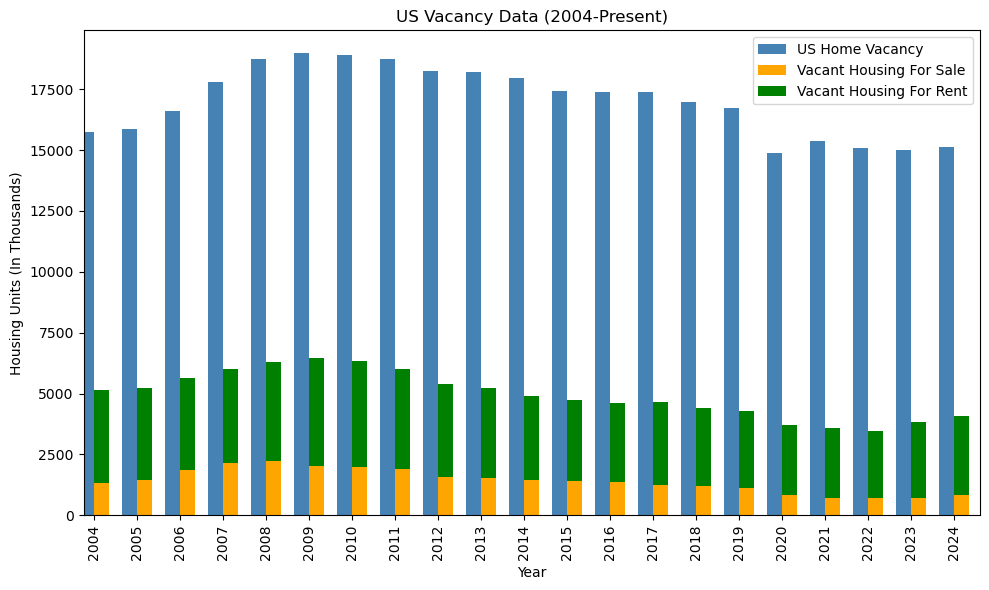

In [511]:

# Converted data to dataframe
housing_availability_df = pd.DataFrame(housing_availability_df)
# Set index
housing_availability_df.set_index('Year', inplace=True)

# Formatted the size of the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting 'US Home Vacancy' as a separate bar (non-stacked)
housing_availability_df['US Home Vacancy'].plot(kind='bar', ax=ax, position=1, width=0.35, color='steelblue', label='US Home Vacancy')

# Stacked bar for 'Vacant Housing For Sale' and 'Vacant Housing For Rent'
housing_availability_df[['Vacant Housing For Sale', 'Vacant Housing For Rent']].plot(kind='bar', ax=ax, stacked=True, position=0, width=0.35, color=['orange', 'green'], label=['Vacant Housing For Sale', 'Vacant Housing For Rent'])

# Created a legend
ax.legend(['US Home Vacancy', 'Vacant Housing For Sale', 'Vacant Housing For Rent'])

# Created labels for the bar chart
plt.title('US Vacancy Data (2004-Present)')
plt.xlabel('Year')
plt.ylabel('Housing Units (In Thousands)')

# Compact the bar chart
plt.tight_layout()
# Displayed bar chart
plt.show()